Libraries

In [1]:
### Welcome! Jump this initial comment section in case this isnt your first time using python (installing libraries)
# pip install numpy
# pip install pandas
# pip install scipy
# pip install -q ipywidgets
# The process is the same for any missing library I may have forgotten :)
### ### ###

# import (aka. use) the following library 
# "as" is used as a shortcut
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd #the pandas module allows us to load DataFrames from external files and work on them.
import math
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist
from scipy.optimize import leastsq
import os
from ipywidgets import IntSlider,interact, FloatSlider, IntRangeSlider, FloatLogSlider, FloatText
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits import Randles
import pandas as pd
import openpyxl


In [2]:
tot_params=[0,0,0]

In [3]:
file = r"U:\Experiments\potentiostat\Definitive EIS\pedot 1% RT\sample1_C01.txt"

In [4]:
f, RE, IM, M, TETA = [], [], [], [], []
values = [0,0,0]
with open(file, 'r') as data:
    lines = data.readlines()[1:]
for line in lines:
    i=0
    for s in line.split():
        s=s.replace(',','.')
        parts=s.split('E')
        number = float(parts[0])  # Convert the number part to float
        exponent = int(parts[1])  # Convert the exponent part to integer
        values[i]=number*(10**exponent)
        i+=1
     
    f.append(values[0])
    RE.append(values[1])
    IM.append(values[2]) #there was a -1 in here multiplying values
    M.append(20*math.log10(math.sqrt(values[1]**2+values[2]**2)))
    TETA.append(
        (-values[2]/values[1])*180/math.pi)

RE=RE[::-1]
IM=IM[::-1]
M1=M[::-1]
TETA1=TETA[::-1]
fe=np.array(f[::-1])[::-1]
Z_real=np.array(RE)[::-1]
Z_imaginary=-np.array(IM)[::-1]

### CHECK WELL CAUSE SOMETIMES IN THE TXT THEY GIVE YOU -IM OR IM 

#Z_real = np.asarray(data["RE"])
#Z_imaginary = np.asarray(data["IM"])
print(Z_imaginary)

[ 4.0338116e+00  3.4299560e+00  2.9276242e+00  2.4688485e+00
  2.0916839e+00  1.7698095e+00  1.4958699e+00  1.2488101e+00
  1.0491713e+00  8.7239832e-01  7.1440041e-01  5.7563150e-01
  4.6193683e-01  3.5462597e-01  2.5459313e-01  1.7004335e-01
  8.9185603e-02  1.7459512e-03 -6.5149918e-02 -1.3424957e-01
 -2.1735267e-01 -2.9070655e-01 -3.6874968e-01 -4.4492176e-01
 -5.4062581e-01 -6.3323474e-01 -7.4990648e-01 -8.7719798e-01
 -1.0187021e+00 -1.1655588e+00 -1.3308578e+00 -1.5394285e+00
 -1.7735353e+00 -2.0828016e+00 -2.3973014e+00 -2.7746754e+00
 -3.1907742e+00 -3.6845474e+00 -4.2371225e+00 -4.8568420e+00
 -5.5397420e+00 -6.2628446e+00 -7.0073099e+00 -7.7496142e+00
 -8.4448013e+00 -9.0418816e+00 -9.5483255e+00 -9.9065313e+00
 -1.0111713e+01 -1.0200229e+01 -1.0192857e+01 -1.0140308e+01
 -1.0081112e+01 -1.0055215e+01 -1.0094964e+01 -1.0233082e+01
 -1.0486521e+01 -1.0880309e+01 -1.1426630e+01 -1.2150003e+01
 -1.3063803e+01 -1.4207411e+01 -1.5580509e+01 -1.7230709e+01
 -1.9206383e+01 -2.15819

In [5]:

Z = Z_real +1j*Z_imaginary



In [6]:
Z_tot = Z_real +1j*Z_imaginary
Z=Z_tot[16:93]
fe=fe[16:93]

(-30.0, 90.0)

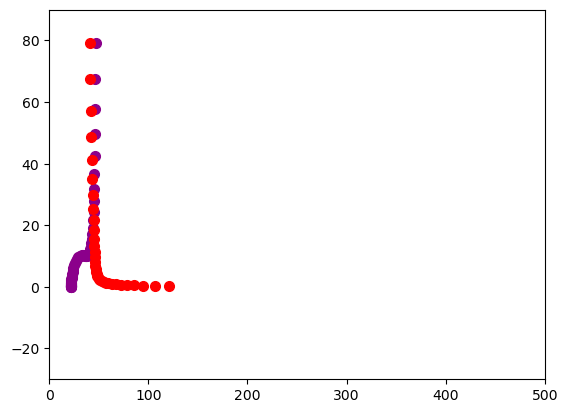

In [7]:

plt.plot(np.real(Z), np.abs(np.imag(Z)),'o',color='darkmagenta', ms=7,label='Data')
plt.plot(np.real(Z), fe,'o',color='red', ms=7,label='Data')
plt.xlim([0,500])
plt.ylim([-30,90])


In [9]:
#### Fitting data with another way



circuit = 'R0-p(R1-Wo0,CPE1)'#'-p(R2,CPE2)'
initial_guess = [22,20,10,0.009,4.99e-5,0.869]#,20000,7e-4,1]
#bounds=((9, 9, 3,0,0,0,0,0,0), (50, 1000, 1000,1000,18000,1,900000000,1000,1))
circuit = CustomCircuit(circuit, initial_guess=initial_guess)
Z_initial = circuit.predict(fe)

circuit.fit(fe, Z, weight_by_modulus=False, global_opt=False)#, bounds=bounds)

Z_fit = circuit.predict(fe)

re = np.real(Z_fit)
im = np.imag(Z_fit)

Zfit_mod = np.array(np.sqrt(((re*re) + (im*im))))
Zfit_pha = np.array(np.arctan2(-im,re) *(180/np.pi))
log_func = np.vectorize(np.log10)
M2=20*log_func(Zfit_mod)
TETA2=Zfit_pha

f2=fe
fitted_params=circuit.parameters_
print(fitted_params)
print(circuit)

C:\Users\l.terenzi\AppData\Local\anaconda3\envs\My-environment\lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


[2.14589593e+01 2.26782559e+01 1.75874186e+01 5.27782060e-03
 8.24134012e-05 8.10317728e-01]

Circuit string: R0-p(R1-Wo0,CPE1)
Fit: True

Initial guesses:
     R0 = 2.20e+01 [Ohm]
     R1 = 2.00e+01 [Ohm]
  Wo0_0 = 1.00e+01 [Ohm]
  Wo0_1 = 9.00e-03 [sec]
  CPE1_0 = 4.99e-05 [Ohm^-1 sec^a]
  CPE1_1 = 8.69e-01 []

Fit parameters:
     R0 = 2.15e+01  (+/- 1.26e-01) [Ohm]
     R1 = 2.27e+01  (+/- 8.72e-01) [Ohm]
  Wo0_0 = 1.76e+01  (+/- 2.59e+00) [Ohm]
  Wo0_1 = 5.28e-03  (+/- 7.88e-04) [sec]
  CPE1_0 = 8.24e-05  (+/- 8.82e-07) [Ohm^-1 sec^a]
  CPE1_1 = 8.10e-01  (+/- 2.38e-03) []



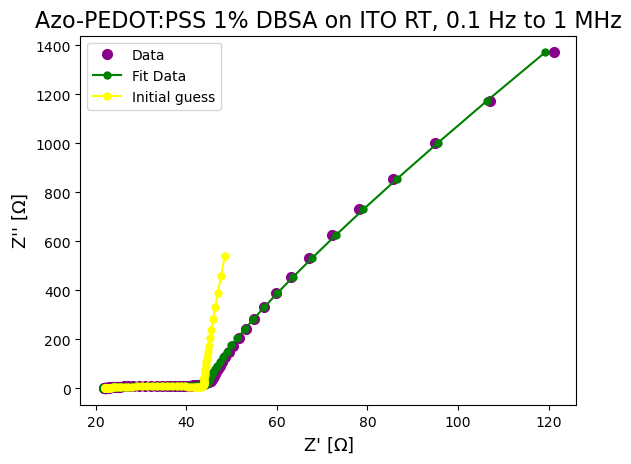

In [13]:

#fig, ax = plt.subplots()
plt.plot(np.real(Z), np.abs(np.imag(Z)),'o',color='darkmagenta', ms=7,label='Data')
plt.plot(np.real(Z_fit), np.abs(np.imag(Z_fit)),'o-',color='green',ms=5, label='Fit Data')
plt.plot(np.real(Z_initial), np.abs(np.imag(Z_initial)),'o-',color='yellow',ms=5, label='Initial guess')
plt.xlabel("Z' [$\u03A9 $]",fontsize=13)
plt.ylabel("Z'' [$\u03A9 $]",fontsize=13)
plt.title('Azo-PEDOT:PSS 1% DBSA on ITO RT, 0.1 Hz to 1 MHz',fontsize=16)
plt.legend(fontsize=10)
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='datalim')
#plt.savefig('azo_pedot_glass_nyquist_0.02%DBSA_1.png',format='png', dpi=1200)
plt.show()

In [14]:
re = np.real(Z_initial)
im = np.imag(Z_initial)

Zinitial_mod = np.array(np.sqrt(((re*re) + (im*im))))
Zinitial_pha = np.array(np.arctan2(-im,re) *(180/np.pi))
log_func = np.vectorize(np.log10)
M3=20*log_func(Zinitial_mod)
TETA3=Zinitial_pha

re = np.real(Z)
im = np.imag(Z)

Z_mod = np.array(np.sqrt(((re*re) + (im*im))))
Z_pha = np.array(np.arctan2(-im,re) *(180/np.pi))

log_func = np.vectorize(np.log10)
M1=20*log_func(Z_mod)
TETA1=Z_pha

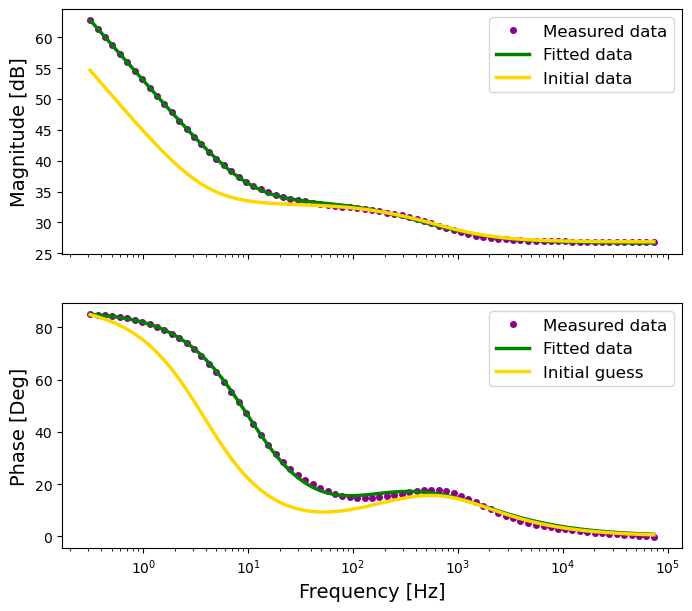

In [20]:

fig, (ax_mag, ax_phase) = plt.subplots(2, 1, sharex=True, figsize=(8,7))
f1=fe
# Magnitude subplot
ax_mag.semilogx(f1, M1,'o',color='darkmagenta',ms=4,label='Measured data')
ax_mag.semilogx(f1, M2,color='green',linewidth=2.5, label='Fitted data')
ax_mag.semilogx(f1, M3,color='gold',linewidth=2.5, label='Initial data')
ax_mag.set_ylabel('Magnitude [dB]',fontsize=14)

ax_mag.legend(fontsize = 12)

# Phase subplot
ax_phase.semilogx(f1, TETA1, 'o',color='darkmagenta',ms=4,label= 'Measured data')
ax_phase.semilogx(f1, TETA2,color='green',linewidth=2.5,label='Fitted data')
ax_phase.semilogx(f1, TETA3,color='gold',linewidth=2.5,label='Initial guess')
ax_phase.set_xlabel('Frequency [Hz]',fontsize=14)
ax_phase.set_ylabel('Phase [Deg]',fontsize=14)
ax_phase.legend(fontsize=12)

#plt.suptitle('Bode plot, azo-PEDOT:PSS 1% DBSA on ITO RT, 0.1 Hz to 1 MHz',fontsize=16)

plt.savefig('mat_meth_pedot_ITO_bode_1%DBSA_RT.png',format='png', dpi=300)

In [53]:
tot_params[1]=fitted_params


In [1006]:
tot_params[0]

array([2.02030443e+01, 8.37806352e+01, 4.15726486e+01, 3.77040658e-02,
       2.35932130e-08, 9.96696261e-01, 2.17884283e+04, 4.15297207e-04,
       9.42876176e-01])

In [54]:
path_exc = r"U:\Experiments\potentiostat\Definitive EIS\fitting results.xlsx"
image_name="Azo R-RC"

In [55]:
sourceFile = openpyxl.load_workbook(path_exc)

maxRowSourceFile = sourceFile['Sheet1'].max_row
maxColSourceFile = sourceFile['Sheet1'].max_column+1
startrow=maxRowSourceFile

In [57]:
database=np.concatenate((np.matrix(tot_params[0]),np.matrix(tot_params[1]),np.matrix(tot_params[1])),axis=0)
database=np.around(database,decimals=12)
workbook = openpyxl.load_workbook(path_exc)

# Select the worksheet to modify
worksheet = workbook['Sheet1']

startrow+=2
# Write a string to a specific cell in the given row (e.g. cell A3)
cell_address = f'A{startrow}'
worksheet[cell_address] = image_name
startrow+=1

# Save the changes to the Excel file
workbook.save(path_exc)
#height_arr=['height'] * len(profiles)
#width_arr=['width']* len(profiles)
#height_arr=height_arr[::-1]
#width_arr=width_arr[::-1]
#df1 = pd.DataFrame(tot_params[0])
#df2 = pd.DataFrame(tot_params[1])
#df3 = pd.DataFrame(tot_params[2])
#df = df.transpose()
#dfs=[df1,df2,df3]
df1=pd.DataFrame(database);print(df1.shape)
dfs=[df1]

with pd.ExcelWriter(path_exc,mode='a',if_sheet_exists='overlay') as writer:
    #i=0
    for df in dfs:
        df.to_excel(writer, engine="xlsxwriter", startrow=startrow, startcol=1, index=False)
       # i=i+1
       
        

(3, 4)


In [773]:
database

array([[1.96040954e+01, 1.92155548e+02, 1.47054522e+02, 6.98549054e-02,
        6.37540000e-08, 9.44993176e-01, 6.69061197e+03, 7.29713007e-04,
        9.03208519e-01],
       [2.10684670e+01, 1.84616421e+02, 1.89198358e+02, 1.02281097e-01,
        5.04910000e-08, 9.60866736e-01, 8.97224419e+03, 6.98284625e-04,
        9.09302605e-01],
       [2.19210705e+01, 1.47083066e+02, 1.14859103e+02, 6.41164930e-02,
        6.09730000e-08, 9.54997986e-01, 8.74723791e+03, 6.92266411e-04,
        9.10257194e-01]])

In [774]:
tot_params

[array([2.03557457e+01, 1.73946520e+01, 3.18552987e+01, 5.96075225e-03,
        5.40646468e-05, 7.90703400e-01]),
 0,
 array([2.29054686e+01, 2.47482275e+01, 5.88160793e+01, 8.82831174e-03,
        4.96775574e-05, 8.06110444e-01])]

In [265]:
###REMEMBER TOCHANGE THE NAME OF THE FILE TO FIT THE SAMPLE###
np.savetxt('test1.txt', fitted_params, fmt='%f')

In [262]:
print(fitted_params)

[2.43444272e+01 6.44217276e+01 3.91970976e+02 4.95706528e+00
 5.88983198e-08 9.31506152e-01 2.97876722e+04 3.88625870e-04
 9.99734099e-01]


In [266]:
b = np.loadtxt('test1.txt', dtype=float)

In [267]:
print(b)

[2.43444270e+01 6.44217280e+01 3.91970976e+02 4.95706500e+00
 0.00000000e+00 9.31506000e-01 2.97876722e+04 3.89000000e-04
 9.99734000e-01]
